In [4]:
import numpy as np
import tensorflow as tf
import cv2
import glob
import matplotlib
from matplotlib import pyplot as plt
import sklearn 
import skimage
from skimage import data, io, filters
from skimage.viewer import ImageViewer
import PIL.Image
import torch
from torchvision import transforms

In [5]:
def image_aug(img):
    pass

In [64]:
#Reading images from a folder
images = [cv2.imread(file) for file in glob.glob("/home/apoorva/Desktop/GSoC/test_image/*.*")]

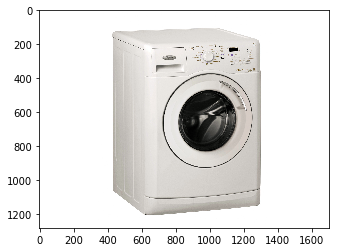

1
(1279, 1705, 3)


In [70]:
for sample_index in range(len(images)):
        plt.figure(100)
        plt.imshow(images[sample_index])
        plt.show()
        
print(len(images))

print(images[0].shape)

Horizontal Flip Image


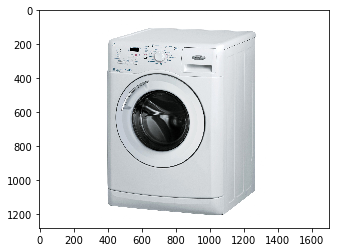

In [5]:
#Image augmentation techniques
img = matplotlib.pyplot.imread("/home/apoorva/Desktop/GSoC/test_image/test1.jpg")
tf_img = tf.convert_to_tensor(img)
mirror = tf.image.flip_left_right(tf_img)

model = tf.global_variables_initializer()

with tf.Session() as session:
    mirror = tf.image.flip_left_right(tf_img)
    session.run(model)
    result = session.run(mirror)

print("Horizontal Flip Image")
plt.imshow(result)
plt.show()


with tf.Session() as session:
    f = open("/home/apoorva/Desktop/GSoC/test_image/mirror", "wb+")
    resized_encoded = tf.image.encode_jpeg(mirror,name="save_me")
    f.write(resized_encoded.eval())
    f.close()


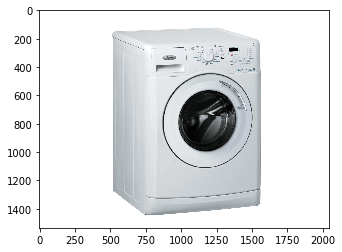

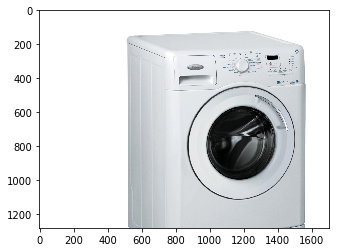

In [147]:
#Scaling out an image
scale_out = skimage.transform.rescale(img, scale=1.2, mode='constant')

plt.imshow(scale_out)
plt.show()

shape = img.shape
crop_img_out = scale_out[0:shape[0], 0:shape[1]]
crop_img_in = scale_in[0:shape[0], 0:shape[1]]

cv2.imwrite('/home/apoorva/Desktop/GSoC/test_image/cropped_out.jpg',crop_img_out)
plt.imshow(crop_img_out)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


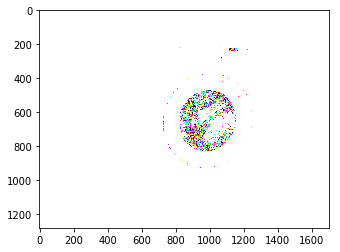

True

In [140]:
#Adding gaussian noise

shape = img.shape#[height, width, channels]
mean =0
var = 1000
sigma = var**0.5
gauss = np.random.normal(mean,sigma,shape)
gauss = gauss.reshape(shape)
gauss = gauss
img_noisy = (img + gauss)
plt.imshow(img_noisy)
plt.show()
cv2.imwrite('/home/apoorva/Desktop/GSoC/test_image/noisy.jpg',img_noisy)

Increased brightness Image


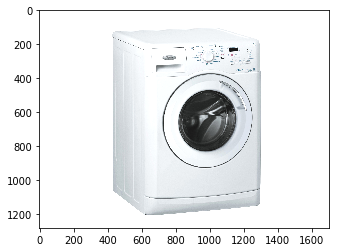

Decreased brightness Image


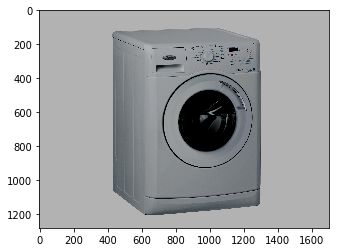

numpy.ndarray

In [29]:
#Changing brightness

img = matplotlib.pyplot.imread("/home/apoorva/Desktop/GSoC/test_image/test1.jpg")
tf_img = tf.convert_to_tensor(img)
bright_img = tf.image.adjust_brightness(tf_img, delta= 0.1)

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(bright_img)

print("Increased brightness Image")
plt.imshow(result)
plt.show()

bright_img = tf.image.adjust_brightness(tf_img, delta= -0.3)

model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(bright_img)

print("Decreased brightness Image")
plt.imshow(result)
plt.show()


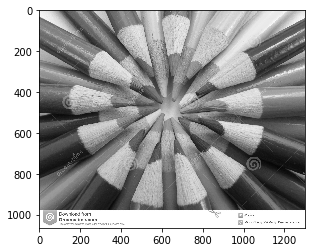

(1065, 1300)


In [63]:
#Changing to black and white
# bw_img=tf.image.rgb_to_grayscale(tf_img)
# model = tf.global_variables_initializer()

# with tf.Session() as session:
#     session.run(model)
#     result = session.run(bw_img)

# print("Increased brightness Image")
# #plt.imshow(result, cmap=plt.get_cmap('gray'))

# cv2.imwrite('/home/apoorva/Desktop/GSoC/test_image/bw.jpg',result)


# print(result.shape)

img = matplotlib.pyplot.imread("/home/apoorva/Desktop/GSoC/test_image/test2.jpg")
r,g,b = img[:,:,0], img[:,:,1], img[:,:,2]
gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
plt.imshow(gray)
plt.show()
print(gray.shape)

Decreased contrast Image


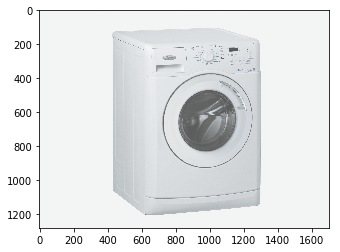

Increased contrast Image


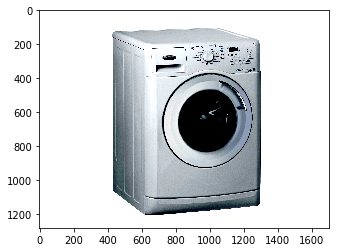

True

In [53]:
#Adjusting contrast
contrast_img = tf.image.adjust_contrast(tf_img, contrast_factor= 0.6)
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(contrast_img)

print("Decreased contrast Image")
plt.imshow(result)
plt.show()

cv2.imwrite('/home/apoorva/Desktop/GSoC/test_image/dec_contrast.jpg',result)

contrast_img = tf.image.adjust_contrast(tf_img, contrast_factor= 3)
model = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(model)
    result = session.run(contrast_img)

print("Increased contrast Image")
plt.imshow(result)
plt.show()

cv2.imwrite('/home/apoorva/Desktop/GSoC/test_image/inc_contrast.jpg',result)



In [ ]:
#Augmentation using cropping

image = cv2.imread("/home/apoorva/Desktop/GSoC/test_image/test2.jpg")

crops = []
width = 800 #change depending upon the input image dimensions
height = 1900 #change depending upon the input image dimensions

(h, w) = image.shape[:2]
coords = [
    [0, 0, width, height],
    [w - width, 0, w, height],
    [w - width, h - height, w, h],
    [0, h - height, width, h]]

dW = int(0.5 * (w - width))
dH = int(0.5 * (h - height))
coords.append([dW, dH, w - dW, h - dH])

for (startX, startY, endX, endY) in coords:
    crop = image[startY:endY, startX:endX]
    crop = cv2.resize(crop, (width, height), interpolation=cv2.INTER_AREA)
    crops.append(crop)

name = "image"
i = 1

for c in crops:
    write_path = name + str(i) + ".png"
    cv2.imwrite(write_path, c)
    cv2.imshow("image", c)
    cv2.waitKey(0)
    i = i + 1

Original Image


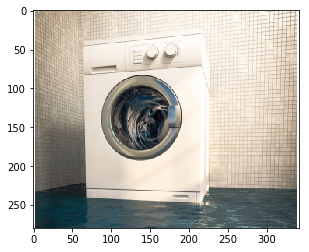

Blurred Image


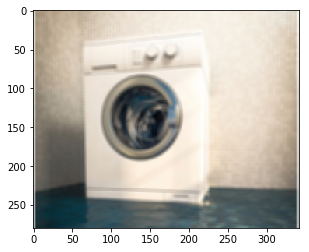

False

In [11]:
#Augmentation using blurring techniques

#Average blurring

image = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
blur = cv2.blur(image,(5,5))
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()
cv2.imwrite("/home/yashk2000/outputs/blur.jpg", blur)

Original Image


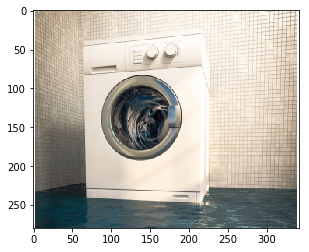

Blurred Image


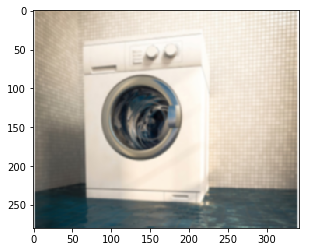

False

In [12]:
# Gaussian blur

image = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
blur = cv2.GaussianBlur(image,(5,5),0)
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()
cv2.imwrite("/home/yashk2000/outputs/gaussianBlur.jpg", blur)

Original Image


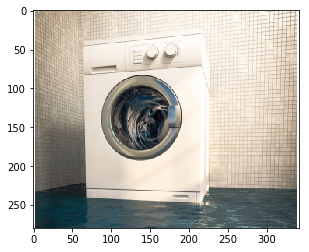

Blurred Image


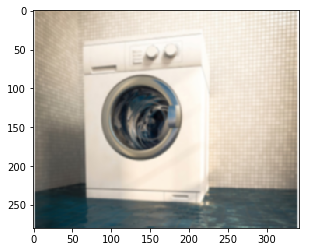

False

In [13]:
# Median Blur

image = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
median = cv2.medianBlur(image,5)
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()
cv2.imwrite("/home/yashk2000/outputs/medianBlur.jpg", blur)

Original Image


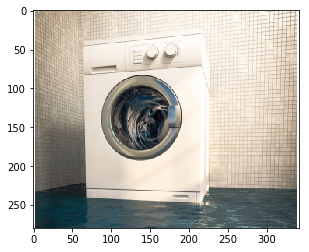

Blurred Image


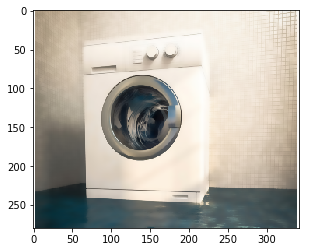

False

In [14]:
# Bilateral Filtering
image = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
blur = cv2.bilateralFilter(image,9,75,75)
print("Original Image")
plt.imshow(image)
plt.show()
print("Blurred Image")
plt.imshow(blur)
plt.show()
cv2.imwrite("/home/yashk2000/outputs/bilateralFiltering.jpg", blur)

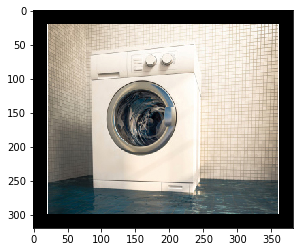

In [4]:
#Padding

src = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
image = cv2.copyMakeBorder(src, 20, 20, 20, 20, cv2.BORDER_CONSTANT)
plt.imshow(image)
plt.show()

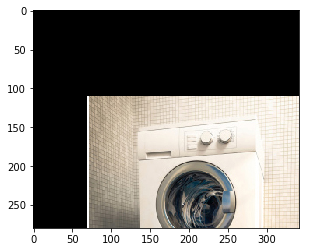

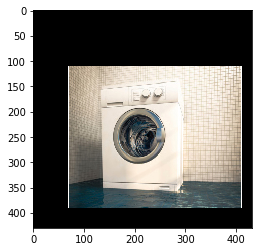

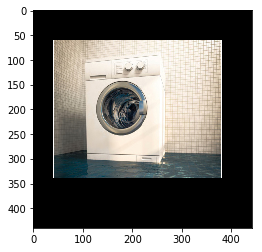

In [5]:
#Translation
img = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
num_rows, num_cols = img.shape[:2]
translation_matrix = np.float32([ [1,0,70], [0,1,110]])
dst = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
plt.imshow(dst)
plt.show()

#Translation with lesser cropping"
dst = cv2.warpAffine(img, translation_matrix, (num_cols + 90, num_rows + 150))
plt.imshow(dst)
plt.show()

#Translation with image in the midddle of a bigger frame",
dst = cv2.warpAffine(img, translation_matrix, (num_cols + 70, num_rows + 110))
translation_matrix = np.float32([ [1,0,-30], [0,1,-50] ])
dst = cv2.warpAffine(dst, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
plt.imshow(dst)
plt.show()

Original Image


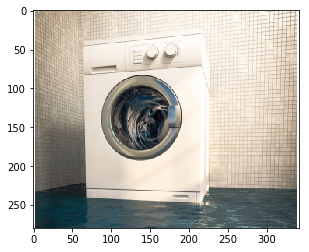

Histogram Equalized Image


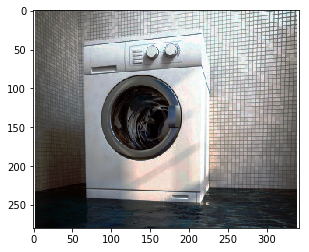

False

In [2]:
#Histogram Equalization
image = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
B, G, R = cv2.split(image)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
equalized = cv2.merge((B, G, R))
print("Original Image")
plt.imshow(image)
plt.show()
print("Histogram Equalized Image")
plt.imshow(equalized)
plt.show()
cv2.imwrite("/home/yashk2000/outputs/equalized.jpg", equalized)

Original Image


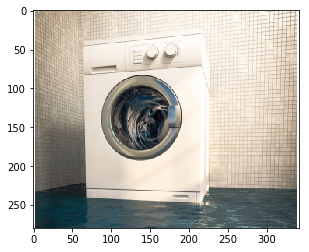

Histogram Equalized Image


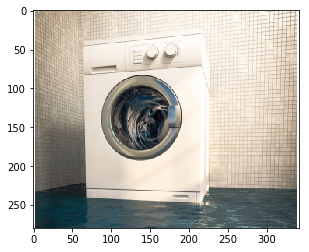

False

In [3]:
#CLAHE"
image = matplotlib.pyplot.imread("/home/yashk2000/wash.jpg")
B, G, R = cv2.split(image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(B)
cl2 = clahe.apply(G)
cl3 = clahe.apply(R)
claheImage = cv2.merge((B, G, R))
print("Original Image")
plt.imshow(image)
plt.show()
print("Histogram Equalized Image")
plt.imshow(claheImage)
plt.show()
cv2.imwrite("/home/yashk2000/outputs/equalized.jpg", claheImage)

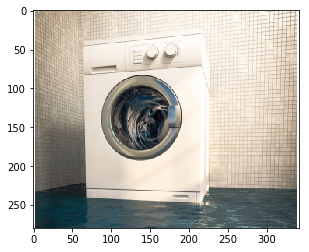

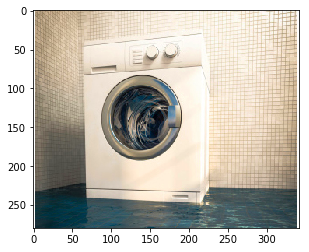

In [10]:
# Saturation

img = PIL.Image.open('/home/yashk2000/wash.jpg')
loader_transform = transforms.ColorJitter(saturation=1)
imgOut = loader_transform(img)
plt.imshow(img)
plt.show()
plt.imshow(imgOut)
plt.show()

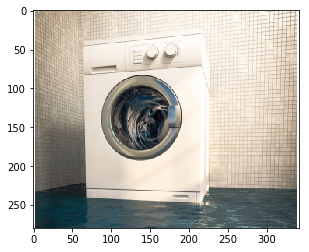

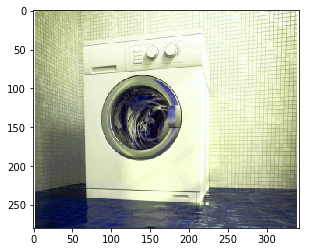

In [12]:
# Hue

img = PIL.Image.open('/home/yashk2000/wash.jpg')
loader_transform = transforms.ColorJitter(hue=0.2)
imgOut = loader_transform(imgOut)
plt.imshow(img)
plt.show()
plt.imshow(imgOut)
plt.show()